In [1]:
from __future__ import unicode_literals
from IPython.display import Image

import networkx

from pytopo import (
    TopoGraph,
    NetworkNode, RouterNode, SwitchNode, ServerNode, FirewallNode,
    S5700Node
)

In [2]:
# graph

g = TopoGraph()

In [3]:
# nodes

node_network1 = NetworkNode('inet1', graph=g)
node_network2 = NetworkNode('inet2', graph=g)

S5700Node('s5700-01', 's5700-01', graph=g)
S5700Node('s5700-02', 's5700-02', graph=g)
S5700Node('s5700-03', 's5700-03', graph=g)
S5700Node('s5700-04', 's5700-04', graph=g)

node_firewall = FirewallNode('firewall', graph=g)
node_router = RouterNode('router', graph=g)
node_switch = SwitchNode('switch', graph=g)

node_server1 = ServerNode('server_1', graph=g)
node_server2 = ServerNode('server_2', graph=g)
node_server3 = ServerNode('server_3', graph=g)

In [4]:
# rank

g.set_same_rank(['s5700-01', 's5700-02', 's5700-03', 's5700-04'], name='cluster_text', color='red', label='S5700', style='dotted', size='100,100')

<AGraph cluster_text _70a578cae27f0000_p_Agraph_t>

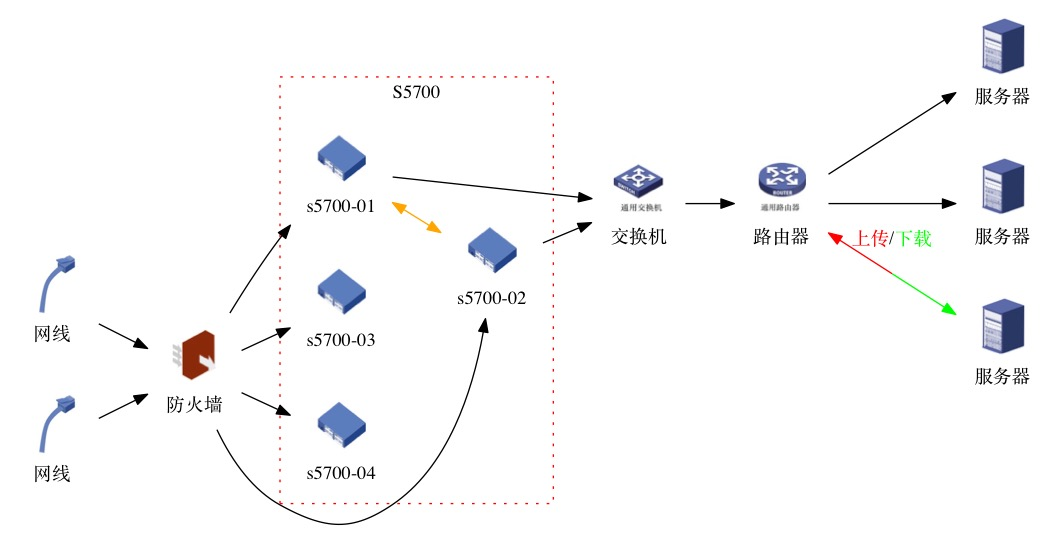

In [5]:
# edges

g.add_edge('inet1', 'firewall')
g.add_edge('inet2', 'firewall')

g.add_edge('firewall', 's5700-01')
g.add_edge('firewall', 's5700-02')
g.add_edge('firewall', 's5700-03')
g.add_edge('firewall', 's5700-04')
g.add_edge('s5700-01', 's5700-02', color='orange', dir='both')

g.add_edge('s5700-01', 'switch')
g.add_edge('s5700-02', 'switch')

g.add_edge('switch', 'router')
g.add_edge('router', 'server_1')
g.add_edge('router', 'server_2')
g.add_edge('router', 'server_3', color='red:green;0.5', dir='both', label='<<BR/><FONT COLOR="red">上传</FONT>/<FONT COLOR="green">下载</FONT>>')

g.draw('./topo.jpg')
Image('./topo.jpg')

In [6]:
print(g.g)

strict digraph {
	graph [bb="0,0,782.89,389.24",
		encoding="UTF-8",
		rankdir=LR,
		size="400,400"
	];
	node [label="\N"];
	subgraph cluster_text {
		graph [bb="206,15.743,411,335.74",
			color=red,
			label=S5700,
			lheight=0.19,
			lp="308.5,324.74",
			lwidth=0.50,
			rank=same,
			size="100,100",
			style=dotted
		];
		"s5700-01"		 [height=1.1389,
			label=<<table border="0" align="center"><tr><td fixedsize="true" width="50" height="50"><img src="./img/s5700.jpg" /></td></tr><tr><td>s5700-01</td></tr></table>>,
			pos="252,264.74",
			shape=plaintext,
			width=1.0556];
		"s5700-02"		 [height=1.1389,
			label=<<table border="0" align="center"><tr><td fixedsize="true" width="50" height="50"><img src="./img/s5700.jpg" /></td></tr><tr><td>s5700-02</td></tr></table>>,
			pos="365,195.74",
			shape=plaintext,
			width=1.0556];
		"s5700-01" -> "s5700-02"		 [color=orange,
			dir=both,
			pos="s,290.27,241.57 e,326.64,218.97 298.96,236.17 305.3,232.23 311.81,228.19 318.14,224.25"];
		"s57